# Dimensionality Reduction I, PCA

We start off dimensionality reduction by discussing perhaps the most popular dimensionaliy reduction technique in data science, principal components analysis (PCA).

## What You'll Accomplish

We'll:
<ul>
    <li>Briefly discuss the need or desire for dimensionality reduction,</li>
    <li>Introduce the concept and mathematics behind PCA,</li>
    <li>Implement PCA on the Wisconsin cancer set,</li>
    <li>Show how to interpret the output of PCA by examining the component vectors with basketball data,</li>
    <li>Introduce the explained variance curve.</li>
</ul>

Let's go!

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## But Why Dimensionality Reduction?

There are a number of reasons! Here are a few:

1. Reducing the number of dimensions is a way we can eliminate noise variables from our data allowing for better models, we'll see an example of this with the Wisconsin Cancer data.

2. Your data is too big. This is common with image classification problems like the MNIST data.

3. Humans can only see in 2 or 3 dimensions, and interesting data sets often have many more dimensions than that.


I've hopefully convinced you of the importance of dimensionality reduction. If not, well that's too bad, humor me anyway.

## Principal Components Analysis (PCA)

PCA is one of the most popular dimensionality reduction techniques. So much so that we may take an entire day on just this topic, sorry manifold learning and t-SNE.

This technique has been around since Karl Pearson's 1903 paper, <a href = "https://www.tandfonline.com/doi/abs/10.1080/14786440109462720"><i>On lines and planes of closest fit to systems of points in space</i></a>.

### The Intuition

When you reduce the dimension of a data set you are inherently losing information. Therefore you want to ensure that you do it in a way that "retains as much information as possible". PCA tackles this problem in a very statistical manner.

There's an idea in statistics that the information of a data set is located within that data set's variation. Thus when you reduce the dimension of a data set, you want to project your data onto a lower dimensional space that captures as much of the original variance in the data as possible. Thinking in terms of optimization, your goal is to project into a lower dimensional hyperplane in a way that maximizes variance.

Here's a heuristic algorithm:
1. Center your data so that each feature has 0 mean, this is done for convenience.
2. Find the direction in space along which projections have the highest variance, this produces the first principal component.
3. Find the direction orthogonal to the first principal component that maximizes variance, this is the second principal component.
4. Continue in this way, the kth principal component is the variance-maximizing direction orthogonal to the previous k-1 components.

Let's see what we mean in a 2-D example:

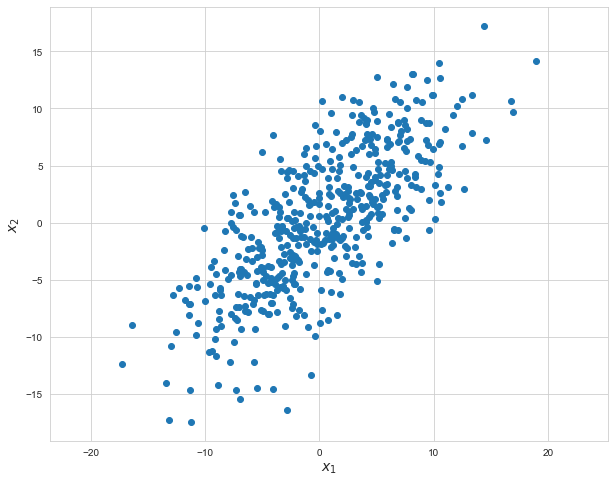

In [2]:
# Make some random data
np.random.seed(440)

x1 = 8*np.random.randn(500)
x2 = 3*np.random.randn(500)

X = np.concatenate([x1.reshape(-1,1),x2.reshape(-1,1)], axis = 1)

angle = -np.pi/4

X = X.dot(np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]]))


plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.axis('equal')

plt.show()

In [3]:
# PCA is stored in decomposition
from sklearn.decomposition import PCA

In [4]:
# make the PCA object
# we'll project down to 2-D
pca = PCA(n_components = 2)

# Fit the data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

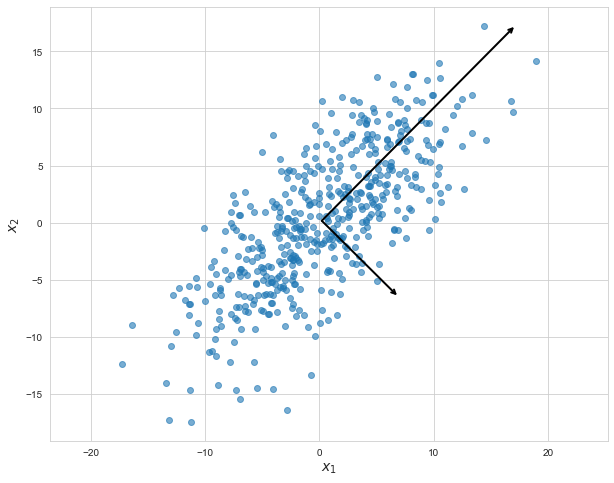

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, 
                    shrinkB=0,
                    color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=.6)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
    
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)

plt.axis('equal')
plt.show()

### The Math, The Myth, The Legend

Now let's get down to the mathematical details. We consider the maximal variance formulation of the problem, for those interested in the original problem statement proposed by Pearson check out the Homework.

Suppose we have $n$ observations of $m$ features, let $X_1,X_2,\dots,X_m$ be $n$ by $1$ vectors containing the observations of each of the $m$ features. And for ease of notation assume each has been centered to have mean $0$.

We'll restrict ourselves to the case of finding the first principal component, the others can be found in a similar fashion.

Let 
$$
X = \left(X_1 | X_2 | \dots |X_m \right)
$$
be an $n$ by $m$ feature matrix.

Our goal is to find $w=(w_1,w_2,\dots,w_m)^T$ so that $\text{Var}(w_1 X_1 + w_2 X_2 + \dots + w_m X_m) = \text{Var}( X w)$ is maximized. Because we have centered the columns of $X$ we have:
$$
\text{Var}(Xw) = E(w^T X^T X w) = w^T E(X^T X) w = w^T \Sigma w,
$$
where $\Sigma$ is the covariance matrix of $X$. In order to ensure our $w$ is finite we impose the constraint that $||w|| = 1$. To solve the constrained optimization problem we use Lagrange multipliers where $f(w) = w^T \Sigma w$ and $g(w) = w^T w - 1$. Using matrix calculus (see the references below for a helpful resource):
$$
\partial_w \left(w^T \Sigma w - \lambda (w^T w - 1)\right) = 2 \Sigma w - 2\lambda w.
$$

Setting this equal to $0$ and solving gives
$$
\Sigma w = \lambda w,
$$
the standard eigenvalue setup.

So the vector $w$ that maximizes variance is an eigenvector corresponding to the largest eigenvalue of the covariance matrix of $X$.

This vector is known as the first principal component, and as luck would have it the remaining principal components correspond to the remaining eigenvectors.



## Questions?


<br>
<br>
<br>

## End Questions

## Classifying Cancer Again

Now let's get some practice implementing PCA to help with supervised learning.

We return once again to classifying cancer.

In [6]:
# import the data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X,y = load_breast_cancer(return_X_y = True)

# test train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25,random_state = 614,shuffle = True,stratify = y)

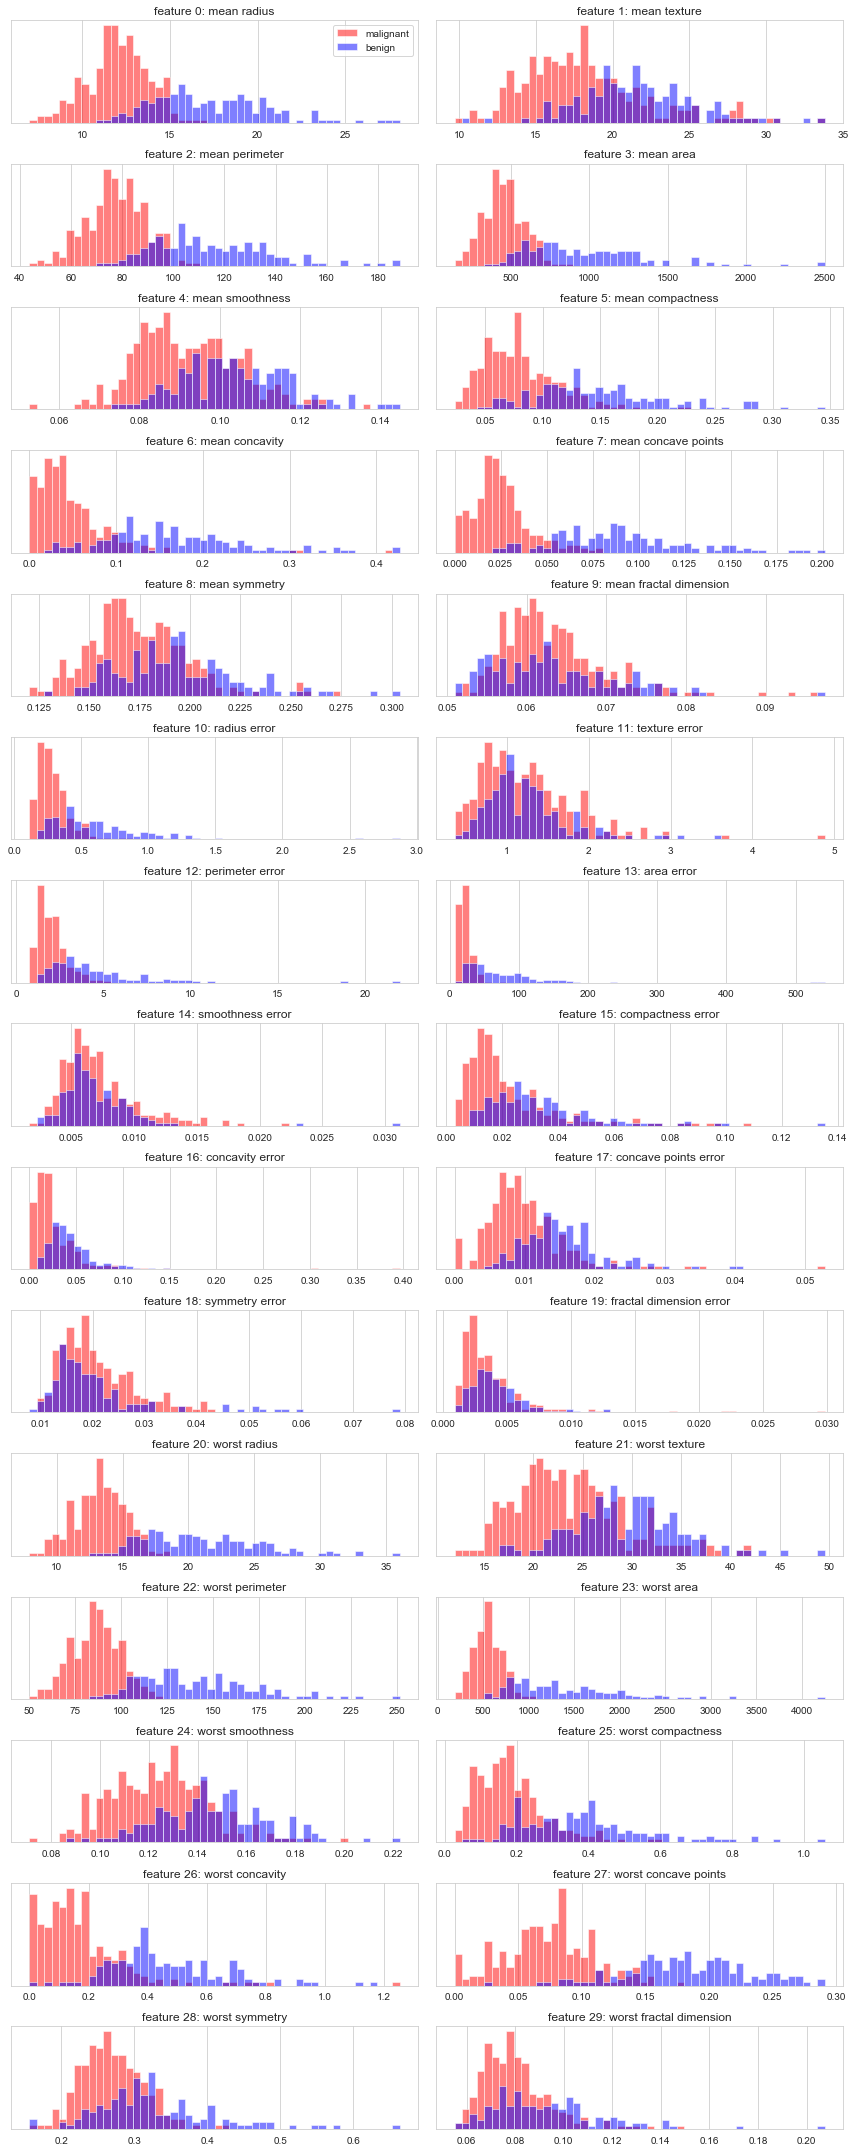

In [7]:
# Let's view the training data
# Note this may take a bit.
fig, axes = plt.subplots(15, 2, figsize = (12,30))

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(X_train[:, i], bins = 50)
    ax[i].hist(X_train[y_train == 1, i], bins = bins, color = 'red', alpha = .5)
    ax[i].hist(X_train[y_train == 0, i], bins = bins, color = 'blue', alpha = .5)
    ax[i].set_title("feature " + str(i) + ": " + cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].legend(['malignant', 'benign'], loc = 'best')
    
fig.tight_layout()

Instead of using our intuition and explatory data analysis let's build a model implementing PCA as an added preprocessing step.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
pca_pipe = Pipeline([('scaler',StandardScaler()),
                ('pca',PCA(n_components=2))])

In [10]:
X_pca = pca_pipe.fit_transform(X_train)

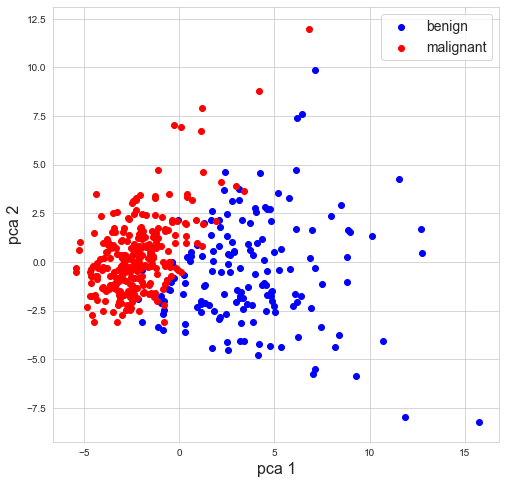

In [11]:
plt.figure(figsize = (8,8))

plt.scatter(X_pca[y_train==0,0],X_pca[y_train==0,1],c='blue',label='benign')
plt.scatter(X_pca[y_train==1,0],X_pca[y_train==1,1],c='red',label='malignant')

plt.legend(fontsize=14)
plt.xlabel("pca 1",fontsize=16)
plt.ylabel("pca 2",fontsize=16)

plt.show()

## Practice

Combine PCA with one of our previous classification techniques to build a cancer classifier. If you have time implement cross validation and get a sense of how well we should expect this approach to work.

In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






## That's Nice, But What Does it Mean?

So we've seen that PCA can be quite useful. However, many of you might be wondering how we can interpret PCA results.

Well let's see.

### 3 > 2

We return to the basketball court. Basketball courts can be sliced into 15 distinct regions, you can then take all of a team's shot attempts and bin them according to the region where they were taken, if you then divide by their total shots taken you've got yourself a team's shot distribution. Below is an image of the court cut into 15 regions.

<img src="CourtZones.png" style="width:50%;"></img>

We now load in data from the 2000-01 and 2018-19 seasons. We'll run this through PCA extracting two components.

In [12]:
nba = pd.read_csv("nba_team_shots.csv")

In [13]:
nba.head()

,team_id,team_name,season,zone_1_perc_att,zone_2_perc_att,zone_3_perc_att,zone_4_perc_att,zone_5_perc_att,zone_6_perc_att,zone_7_perc_att,zone_8_perc_att,zone_9_perc_att,zone_10_perc_att,zone_11_perc_att,zone_12_perc_att,zone_13_perc_att,zone_14_perc_att,zone_15_perc_att
0,1610612737,Atlanta Hawks,2000-01,0.272795,0.158518,0.015447,0.011698,0.142022,0.140822,0.044541,0.036293,0.037493,0.012747,0.020996,0.044541,0.040192,0.019496,0.002400
1,1610612737,Atlanta Hawks,2018-19,0.364700,0.129187,0.007044,0.011696,0.015816,0.020867,0.010367,0.015949,0.021531,0.048777,0.058612,0.092371,0.099814,0.100478,0.002791
2,1610612738,Boston Celtics,2000-01,0.332768,0.110871,0.007710,0.009252,0.093292,0.077409,0.042097,0.041172,0.033616,0.028682,0.038859,0.083423,0.069545,0.028682,0.002621
3,1610612738,Boston Celtics,2018-19,0.286811,0.122727,0.010643,0.013337,0.038394,0.050653,0.026135,0.032063,0.038394,0.039607,0.041493,0.107369,0.116395,0.075037,0.000943
4,1610612739,Cleveland Cavaliers,2000-01,0.317973,0.159522,0.009186,0.011635,0.149724,0.131353,0.043784,0.040263,0.035824,0.020974,0.014697,0.025107,0.023576,0.012400,0.003980


In [14]:
# Make a PCA object
pca = PCA(n_components = 2)

In [15]:
# fit it on the desired columns
nba_pca = pca.fit_transform(nba[['zone_' + str(i) + '_perc_att' for i in range(1,16)]])

nba['pca_1'] = nba_pca[:,0]
nba['pca_2'] = nba_pca[:,1]

In addition to the projected values we can examine the projection vectors ($w$ from earlier) called the components.

We'll do this with a sorted data frame, and a heat map.

In [16]:
pd.DataFrame({'pca_1':pca.components_[0,:],
              'pca_2':pca.components_[1,:]},
            index = ['zone_' + str(i) + '_perc_att' for i in range(1,16)]).sort_values('pca_1')

,pca_1,pca_2
zone_12_perc_att,-0.316429,-0.240999
zone_13_perc_att,-0.299018,-0.333721
zone_1_perc_att,-0.271326,0.886021
zone_14_perc_att,-0.268009,-0.160302
zone_10_perc_att,-0.120901,-0.085819
zone_11_perc_att,-0.118158,-0.104101
zone_2_perc_att,-0.022056,0.024239
zone_15_perc_att,-0.001319,-0.003777
zone_4_perc_att,0.009649,-0.009254
zone_3_perc_att,0.015278,0.000656


In [17]:
pd.DataFrame({'pca_1':pca.components_[0,:],
              'pca_2':pca.components_[1,:]},
            index = ['zone_' + str(i) + '_perc_att' for i in range(1,16)]).sort_values('pca_2')

,pca_1,pca_2
zone_13_perc_att,-0.299018,-0.333721
zone_12_perc_att,-0.316429,-0.240999
zone_14_perc_att,-0.268009,-0.160302
zone_11_perc_att,-0.118158,-0.104101
zone_10_perc_att,-0.120901,-0.085819
zone_6_perc_att,0.485191,-0.013519
zone_4_perc_att,0.009649,-0.009254
zone_15_perc_att,-0.001319,-0.003777
zone_3_perc_att,0.015278,0.000656
zone_5_perc_att,0.601177,0.002950


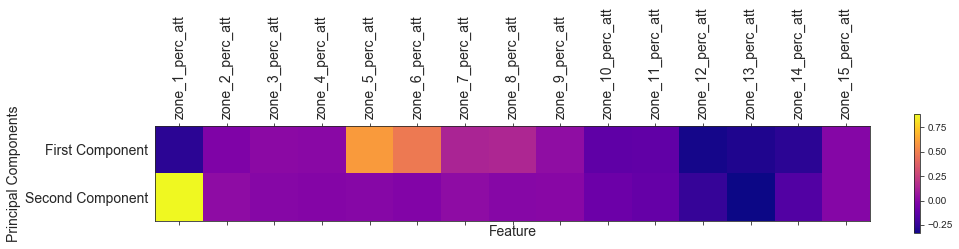

In [18]:
# We can visualize with a heatmap
sns.set_style("white")
plt.matshow(pca.components_, cmap = 'plasma')

plt.yticks([0,1], ["First Component", "Second Component"],
          fontsize = 14)

plt.colorbar()

plt.xticks(range(15),
          ['zone_' + str(i) + '_perc_att' for i in range(1,16)], rotation = 90, 
          fontsize = 14)

plt.xlabel("Feature", fontsize = 14)
plt.ylabel("Principal Components", fontsize = 14)

plt.show()

What do these two vectors mean? For any principal component vector, positive (meaning greater than 0) vector entries correspond to more positive principal component values. For example a team with 100% of their shots from Zone 12 will have as negative a first principal component value as possible because that is the most negative row of the first principal component vector table. On the other hand, a team that shot 100% of their shots from Zone 5 will have as positive a first principal component value as possible because that is the most positive row of the first principal component vector table. 

In this way we can read through the principal components and see which features are being picked up in that component. We can also see how this gets reflected in the PCA plot.

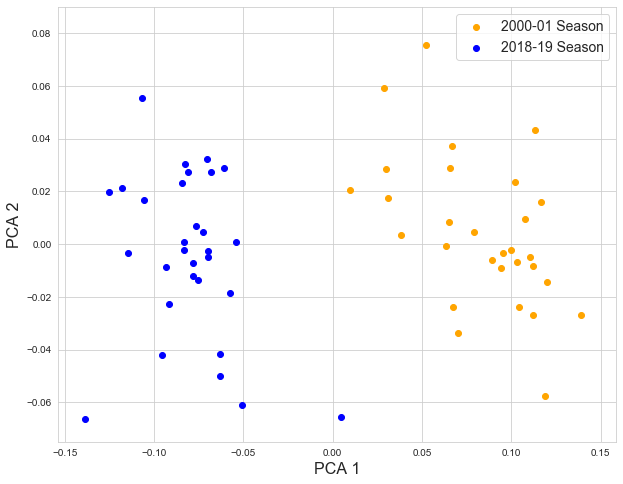

In [19]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,8))

plt.scatter(nba.loc[nba.season == '2000-01','pca_1'].values,
            nba.loc[nba.season == '2000-01','pca_2'].values,
            color = 'orange', label = "2000-01 Season")

plt.scatter(nba.loc[nba.season == '2018-19','pca_1'].values,
            nba.loc[nba.season == '2018-19','pca_2'].values,
            color = 'blue', label = "2018-19 Season")

plt.xlabel("PCA 1", fontsize=16)
plt.ylabel("PCA 2", fontsize=16)

plt.legend(fontsize=14)

plt.show()

This plot tells us that NBA teams from 20 years ago (for the most part) had a much different approach to the game. This reflects the shocking revalation that <a href="https://fivethirtyeight.com/features/how-mapping-shots-in-the-nba-changed-it-forever/">$3$ points is worth more than $2$</a>.

If you're interested in learning more check out my blog post (a shameless plug) on how we can use PCA to track changes in NBA shot distributions over time <a href="http://matthew-osborne.com/mtodata/Posts/PCA-in-NBA.html">http://matthew-osborne.com/mtodata/Posts/PCA-in-NBA.html</a>.

## Questions

<br>
<br>
<br>
<br>

## End Questions

## Practice

Examine the component vectors from the Wisconsin Cancer data. What features about the tumor image seem important?

In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






## How Many Components? The Explained Variance Curve

Another question you may want to answer is how many components should I use?

This is where something called the <i>explained variance curve</i> comes into play. sklearn's PCA function does give us the tools to figure out how much of the variance each principal component explains. This is known as the explained variance ratio of the component and is available via the explained_variance_ratio_ variable. These values indicate the proportion of the original dataset's variance that lies along the axis of each principal component.

In [20]:
print(pca.explained_variance_ratio_)

[0.76703877 0.0901631 ]


Let's return once more to the MNIST data set, the real one.

In [21]:
X = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

In [22]:
pca = PCA(n_components=200)

pca.fit(X[X.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

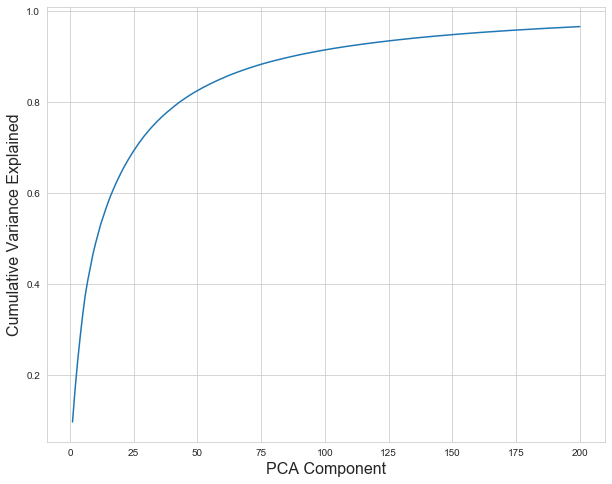

In [23]:
plt.figure(figsize=(10,8))

plt.plot(range(1,201),
        np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("PCA Component", fontsize=16)
plt.ylabel("Cumulative Variance Explained", fontsize=16)

plt.show()

In [24]:
np.shape(X)

(42000, 785)

As we can see the original data set has $784$ features, however we are able to capture over $80\%$ of the variance with fewer than $50$.

One rule of thumb for choosing the dimension of the hyperplane is to look for the "elbow" in the cumulative explained variance plot. This is where the explained variance ratio stops growing as quickly and is thought of as the "intrinsic dimensionality" of the dataset. 

An additional feature of `sklearn` PCA is that you can tell it what percentage of the variance you'd like.

In [27]:
pca = PCA(n_components=.5)

X_pca = pca.fit_transform(X[X.columns[1:]])

In [28]:
np.shape(X_pca)

(42000, 11)

## Practice

Examine the Explained Variance Ratio for the Wisconsin Cancer Data Set.

In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






In [ ]:
# Code here 






That's it for this notebook! I encourage you to check out the Unsupervised Learning Homework where we introduce common extensions of PCA for various types of data as well as show how you can use PCA to address multicolinearity.

See you in Notebook 4 where we introduce Manifold techniques.

## References 

<a href = "https://www.tandfonline.com/doi/abs/10.1080/14786440109462720">On lines and planes of closest fit to systems of points in space</a>

<a href="https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf">Univeristy of Waterloo Matrix Cookbook</a>

<a href="http://www.math.kent.edu/~reichel/courses/monte.carlo/alt4.7d.pdf">Kent State University Notes on Random Vectors and Matrices</a>

<a href="http://www.stat.columbia.edu/~fwood/Teaching/w4315/Fall2009/pca.pdf">Columbia PCA notes</a>

<a href="https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf">Central Michigan PCA notes</a>